In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
import gym
import QDgym

In [6]:
env = gym.make("QDHalfCheetahBulletEnv-v0")
# reset environment
state = env.reset()
done = False
# eval loop
a = []
while not done: 
    action = env.action_space.sample()
    state, reward, done, info = env.step(action) 
    a.append(env.desc)
# get fitness and BD
fitness = env.tot_reward
behaviour_descriptor = env.desc # alternatively behaviour_descriptor = info["bc"] for compatability with the code released for MAP-Elites-ES
# close environment
env.close()

The behavioural desciptor is 2-dimentional and defined as proportion of feet contact time with the ground in the order ['ffoot', 'bfoot']


In [5]:
behaviour_descriptor

array([0.236, 0.643])

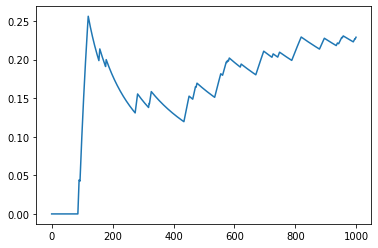

In [8]:
plt.plot([x[0] for x in a])

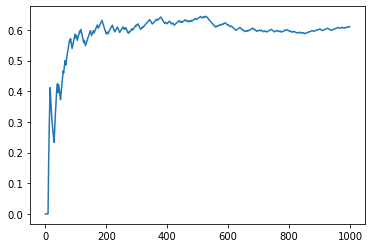

In [9]:
plt.plot([x[1] for x in a])

In [ ]:
# I am trying to write down the Evolvability Map elites algorithm
# Let us do it in steps:
#   1. let me write down the basic code for normal map elites
#   2. Let me write down ES map elites
#   3. Let me write down Evolvability map elites
#   4. Let me write down variants of the algorithm

In [ ]:
def fitness_func(x):
    fitness = x[0]*x[1]
    bc = np.array([x[0],x[1]])
    return fitness,bc

In [ ]:

# uniform grid
map_elites_grid_description = {
    "bc_limits" : [[-1,1],[-1,1]],
    "grid_dims" : [20,20],
}

def behaviour_to_cell_coords(bc,map_elites_grid_description):
    cell_coords = None # calculate which cell the behaviour is in
    return cell_coords
    
def create_map_elites_grid(map_elites_grid_description):
    return [[]] #array with the poroper size
    
    
# A cell holds all kind of info
# Most important is current elite: 
example_cell = {
    "fitness_elite_fitness"
    "fitness_elite_params"
    "innovation_elite"
    "evolvability_elite"
    "stats" # how many times upgraded, fitness history ...
}
        
bc_archive
    
    
    

In [ ]:
def update_grid(grid,fitness,bc,new_individual):
    cell_coords = behaviour_to_cell_coords(bc)
    cell_elite_fitness = grid[cell_coords]["fitness_elite_fitness"]
    
    if cell_elite_fitness <= fitness:
        # replace old elite with new individual
        grid[cell_coords]["fitness_elite_fitness"] = fitness
        grid[cell_coords]["fitness_elite_params"] = mutated_copy

In [ ]:
# First normal map elites

# grid is an n-d array, where each element is a dict, containing cell data
grid = create_map_elites_grid(map_elites_grid_description)
# bc archive is a list of (tuple?), conatining bc of all the seen individuals (and maybe  some extra data...) 
bc_archive = []



while True:
    
    parent_cell = select_parent_cell(grid)  # will return none if no cell available yet
    parent = select_parent_elite(parent_cell)  # will be randomly init if parent_cell is none
    
    # choose ES update
    operator = select_operator()
    
    # update / mutate individual
    updated_individual_1,evo_0,innov_0 = es_update(parent)
    updated_individual_2,evo_1,innov_1 = es_update(updated_individual_1) # TODO cache updated_individual_2, if we ever want to update updated_individual_1 in the future
    # Also we can use updated_individual_2 now to update fitness if we want to
    
    # evaluate
    fitness_1,bc_1 = evaluate(updated_individual_1)
    
    # update grid
    grid = update_grid(grid,fitness_1,bc_1,updated_individual_1,evo_1,innov_1)
    bc_archive = update_archive(bc_archive,bc_1,updated_individual_1)
    
    
    
    
    
    

    
    
    
    
    





In [ ]:
# Grid type
# - single
# - multi, independent
# - multi, nd_sort
# - multi, coop



In [ ]:
# Build simple working prototype

In [12]:
def create_map_elites_grid(map_elites_grid_description):
    grid = np.empty(shape = map_elites_grid_description["grid_dims"], dtype=object)
    return grid

def get_non_empty_cells(grid,map_elites_grid_description):
    grid != None

In [ ]:
map_elites_grid_description = {
    "bc_limits" : [[-1,1],[-1,1]],
    "grid_dims" : [20,20],
}

grid = create_map_elites_grid(map_elites_grid_description)

for gen_i in range(3):
    
    parent_cell = select_parent_cell(grid)  # will return none if no cell available yet
    parent = select_parent_elite(parent_cell)  # will be randomly init if parent_cell is none
    
    

In [17]:
map_elites_grid_description = {
    "bc_limits" : [[-1,1],[-1,1]],
    "grid_dims" : [20,20],
}
grid = create_map_elites_grid(map_elites_grid_description)
len(grid)
len(grid[2])

20

In [ ]:
def create_map_elites_grid(map_elites_grid_description):
    num_elements = np.prod(map_elites_grid_description["grid_dims"])

In [18]:
num_elements = np.prod(map_elites_grid_description["grid_dims"])
grid = np.array()

In [23]:
grid = np.empty(shape = map_elites_grid_description["grid_dims"], dtype=object)

In [27]:
a = grid[4,7]

In [35]:
grid[4,7] = {4: 5}
grid[7,7] = {4: 7}

In [39]:
non_empty_mask = grid != None
non_empty_coords = np.where(non_empty_mask)
non_empyt_cells = grid[non_empty_mask]

In [43]:
a = object()

In [48]:
non_empty_coords

(array([4, 7]), array([7, 7]))

In [50]:
import random

In [54]:
choosen_coords = random.choice(non_empty_coords)

In [55]:
choosen_cell = [for coord in choosen_coords]  grid[choosen_coords]

array([[None, None, None, None, None, None, None, {4: 5}, None, None,
        None, None, None, None, None, None, None, None, None, None],
       [None, None, None, None, None, None, None, {4: 7}, None, None,
        None, None, None, None, None, None, None, None, None, None]],
      dtype=object)

In [56]:
choosen_coords

array([4, 7])

In [58]:
grid[tuple(choosen_coords)]

{4: 5}

In [69]:
config = {
    "map_elites_grid_description" : {
    "bc_limits" : [[-1,1],[-1,1]],
    "grid_dims" : [20,20],
}}

bc = [1,-0.89]


coords = []
for bc_dim,behaviour in enumerate(bc):

    limits = config["map_elites_grid_description"]["bc_limits"][bc_dim]
    num_grids = config["map_elites_grid_description"]["grid_dims"][bc_dim]

    if behaviour <= limits[0]:
        coord = 0
    elif behaviour >= limits[1]:
        coord = num_grids-1
    else:
        step = (limits[1]-limits[0]) / num_grids
        coord = int((behaviour - limits[0]) / step)
        
    coords.append(coord)
coords

[19, 1]

In [89]:
a = torch.randn(10,2)
mean_a = torch.mean(a,dim=0)
torch.sum((a-mean_a)**2) / 10


tensor(3.1110)

In [80]:
a - mean_a

tensor([[ 8.4407e-01,  1.1173e-01],
        [-5.5950e-01, -1.0724e+00],
        [ 1.1421e+00,  1.3408e+00],
        [-5.2538e-01, -1.6021e-03],
        [-1.3224e+00,  2.4174e-01],
        [ 9.6061e-01, -7.2827e-02],
        [-5.7323e-01,  9.5675e-01],
        [ 1.1200e-02,  5.0863e-01],
        [ 2.6036e-01, -3.1742e-01],
        [-2.3784e-01, -1.6954e+00]])

In [79]:
a

tensor([[ 1.1608,  0.2259],
        [-0.2428, -0.9582],
        [ 1.4588,  1.4549],
        [-0.2087,  0.1125],
        [-1.0057,  0.3559],
        [ 1.2773,  0.0413],
        [-0.2565,  1.0709],
        [ 0.3279,  0.6228],
        [ 0.5771, -0.2033],
        [ 0.0789, -1.5813]])

In [81]:
mean_a

tensor([0.3167, 0.1141])

In [91]:
from sklearn.neighbors import KDTree
from sklearn.cluster import KMeans

In [ ]:
kdt = KDTree(c, leaf_size=30, metric='euclidean') # main k-nn

In [92]:
KMeans

sklearn.cluster._kmeans.KMeans

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from es_map import behavior_map
from es_map import novelty_archive

In [2]:
# DUMMY map elites loop

config = {
    
    "map_elites_grid_description" : {
        "bc_limits" : [[-1,1],[-1,1]],
        "grid_dims" : [20,20],
        },
}



b_map = behavior_map.Grid_behaviour_map(config)
b_archive = novelty_archive.NoveltyArchive(bc_dim = len(config["map_elites_grid_description"]["grid_dims"]))



def get_random_model_parameters():
    return np.random.randn(2)


def evaluate_model(x):
    fitness = np.prod(x)
    bc = np.sin(x)
    return fitness,bc

 
for gen in range(1000):
    
    params = get_random_model_parameters()
    fitness,bc = evaluate_model(params)
    
    novelty = b_archive.calculate_novelty(bc)
    b_archive.add_to_archive(bc)
    
    coords = b_map.get_cell_coords(bc,config)
    old_elite = b_map.data[coords]
    if old_elite is None or old_elite["eval_fitness"] < fitness:
        #print("New elite at: ",coords)
        b_map.data[coords] = {
            "params" : params,  # 1d torch tensor containing the parameters 
            "eval_fitness" : fitness,
            "eval_bc" : bc,
            
            "eval_novelty" : novelty,
        }
    
        
    
    
    

In [3]:

fitnesses = []
novelties = []
for elite in b_map.data.flatten():
    if elite is not None:
        fitnesses.append(elite["eval_fitness"])
        novelties.append(elite["eval_novelty"])
    else:
        fitnesses.append(None)
        novelties.append(None)


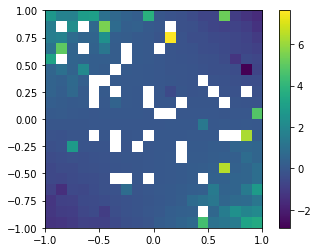

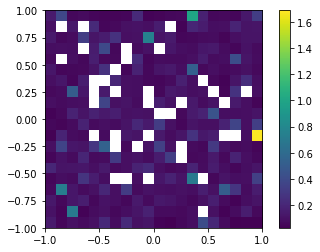

In [4]:
plt.imshow(np.array(fitnesses).astype(np.float).reshape(20,20),extent=[-1,1,-1,1])
plt.colorbar()
plt.show()
plt.imshow(np.array(novelties).astype(np.float).reshape(20,20),extent=[-1,1,-1,1])
plt.colorbar()

In [6]:
len(novelties)

400

In [7]:
len(fitnesses)

400

In [1]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [2]:
all_bcs = np.random.randn(10,2)

nn_model = NearestNeighbors(n_neighbors=5, algorithm='ball_tree', metric='euclidean')
nn_model.fit(all_bcs)




NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='euclidean',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [8]:
distances, a = nn_model.kneighbors(np.random.randn(1,2), n_neighbors=5)

In [9]:
np.mean(distances,axis=1)

array([0.89094991])

In [17]:
nn_model = NearestNeighbors(n_neighbors=5, algorithm='ball_tree', metric='euclidean')
nn_model.fit(np.array([]).reshape(-1,2))

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.

In [3]:
def get_random_individual(config):
    from es_map.interaction import interaction
    env = interaction.build_interaction_module(config["env_id"],config)
    theta = env.initial_theta()
    return theta

In [10]:
config = {
    "env_id" : "DamageAnt-v2",
    "policy_args" : {
        "init" : "normc",
        "layers" :[256, 256],
       "activation" : 'tanh',
       "action_noise" : 0.01,
    },
    "env_args" : {
        "use_norm_obs" : True,
    },
}
a = get_random_individual(config)
a

array([ 0.00275314, -0.0019562 ,  0.00258027, ...,  0.        ,
        0.        ,  0.        ], dtype=float32)

In [ ]:
np.random.

In [1]:
from dask.distributed import Client
import dask
import matplotlib.pyplot as plt

import os
os.environ["MKL_NUM_THREADS"] = "1" 
os.environ["NUMEXPR_NUM_THREADS"] = "1" 
os.environ["OMP_NUM_THREADS"] = "1" 
import numpy as np

In [2]:
import os
os.chdir("/scratch/ak1774/runs")

In [3]:
client = Client(n_workers=60, threads_per_worker=1)

In [4]:
def set_up_worker():
    import os
    os.environ["MKL_NUM_THREADS"] = "1" 
    os.environ["NUMEXPR_NUM_THREADS"] = "1" 
    os.environ["OMP_NUM_THREADS"] = "1" 
    
client.run(set_up_worker);

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
from es_map import es_update

In [7]:
config = {
    "env_id" : "DamageAnt-v2",
    "policy_args" : {
        "init" : "normc",
        "layers" :[256, 256],
       "activation" : 'tanh',
       "action_noise" : 0.01,
    },
    "env_args" : {
        "use_norm_obs" : True,
    },
    
    "ES_popsize" : 100,
    "ES_sigma" : 0.02,
    "ES_EVALUATION_BATCH_SIZE" : 5,
    "ES_lr" : 0.01,
    
    "ES_CENTRAL_NUM_EVALUATIONS" : 30,
    
    "GA_MAP_ELITES_NUM_GENERATIONS" : 1000,
    
    "GA_CHILDREN_PER_GENERATION" : 200,
    "GA_NUM_EVALUATIONS" : 20,
    
    "GA_MUTATION_POWER" : 0.02,
    
    "map_elites_grid_description" : {
        "bc_limits" : [[0,1],[0,1],[0,1],[0,1]],
        "grid_dims" : [6,6,6,6],
    },
    
    "CHECKPOINT_FREQUENCY" : 100,
    "PLOT_FREQUENCY" : 100,
}

In [8]:
from es_map.interaction import interaction
env = interaction.build_interaction_module(config["env_id"],config)
central_theta = env.initial_theta()
obs_mean = np.zeros(env.env.observation_space.shape)
obs_std = np.ones(env.env.observation_space.shape)

In [9]:
#results = es_update.es_evaluate_children(client,central_theta,obs_mean,obs_std,config)

In [10]:
import time
now = time.time()
#oo = es_update.es_update(theta=central_theta,child_evaluations=results,config=config)
print(time.time()-now)

5.4836273193359375e-05


In [11]:
from es_map import behavior_map
from es_map import novelty_archive

In [12]:
def get_random_individual(config):
    from es_map.interaction import interaction
    env = interaction.build_interaction_module(config["env_id"],config)
    theta = env.initial_theta()
    return theta

In [13]:
def calculate_obs_stats(sum,sumsq,count):
    if count == 0:
        return np.zeros_like(sum),np.ones_like(sum)
    mean = sum / count
    std = np.sqrt(np.maximum(sumsq / count - np.square(mean), 1e-2))
    return mean,std
    
   

In [15]:
import wandb
config
#wandb.config = config
wandb.init(project="evolvability_map_elites", entity="adam_katona")
wandb.run.name = "me_ga_test1"
wandb.run.config.update(config)

run_name = wandb.run.dir.split("/")[-2]
run_checkpoint_path = "/scratch/ak1774/runs/large_files/" + run_name
os.makedirs(run_checkpoint_path,exist_ok=True)

In [17]:

DEBUG = True
if DEBUG is True:
    config["GA_CHILDREN_PER_GENERATION"] = 20
    config["GA_NUM_EVALUATIONS"] = 4
    

b_map = behavior_map.Grid_behaviour_map(config)
b_archive = novelty_archive.NoveltyArchive(bc_dim = len(config["map_elites_grid_description"]["grid_dims"]))


run_name = wandb.run.dir.split("/")[-2]
run_checkpoint_path = "/scratch/ak1774/runs/large_files/" + run_name

evaluations_per_generation = config["GA_CHILDREN_PER_GENERATION"] * config["GA_NUM_EVALUATIONS"]
# es evaluations
# evaluations_per_generation = config["ES_popsize"] + config["ES_CENTRAL_NUM_EVALUATIONS"] 

generation_number = 0
evaluations_so_far = 0
best_fitness_so_far = 0
best_model_so_far = None


# log strategy:
# - collect things to log at every step
# - collect things to log at every n step
# - collect things for the summary (best fitness so far etc.) (wandb.run.summary["best_accuracy"] = test_accuracy)
# - save latest model??  Save latest best model, save latest most evolvable
#  most innovative history, best fitness history?

# Do I also save logs as text?
# Also define x axis. 
# - evaluations
# - generations


while True:
    if generation_number >= config["GA_MAP_ELITES_NUM_GENERATIONS"]:
        break

    use_single_parent = False
    non_empty_cells = b_map.get_non_empty_cells(config)
    
    if use_single_parent:
        if len(non_empty_cells) == 0:
            parent_cell = None
            parent_params = get_random_individual(config)
            parent_obs_mean = None
            parent_obs_std = None
        else:
            parent_cell = np.random.choice(non_empty_cells)  # NOTE, here goes cell selection method
            parent_params = parent_cell["params"]
            parent_obs_mean,parent_obs_std = calculate_obs_stats( parent_cell["obs_stats"]["obs_sum"],
                                                                  parent_cell["obs_stats"]["obs_sq"],
                                                                  parent_cell["obs_stats"]["obs_count"])

        # instead of evaluating one child at a time, evaluate a bunch
        # for example 200 children , times 10 evaluations, meaning 2000 episodes per generation 
        # then try to insert all of them into the archive

        child_results = es_update.ga_evaluate_children(client,theta=parent_params,obs_mean=parent_obs_mean,obs_std=parent_obs_std,config=config)
    
    # use all the elite as parents
    else:
        parent_datas = []
        for parent_i in range(config["GA_CHILDREN_PER_GENERATION"]):
            if len(non_empty_cells) == 0:
                parent_cell = None
                parent_params = get_random_individual(config)
                parent_obs_mean = None
                parent_obs_std = None
            else:
                parent_cell = np.random.choice(non_empty_cells)  # NOTE, here goes cell selection method
                parent_params = parent_cell["params"]
                parent_obs_mean,parent_obs_std = calculate_obs_stats( parent_cell["obs_stats"]["obs_sum"],
                                                                      parent_cell["obs_stats"]["obs_sq"],
                                                                      parent_cell["obs_stats"]["obs_count"])
            parent_datas.append((parent_params,parent_obs_mean,parent_obs_std))
    
        child_results = es_update.ga_evaluate_children_multi_parent(client,parent_datas,config)
    
    
    for child_res in child_results:
        
        mean_fitness = child_res["mean_fitness"]
        mean_bc = child_res["mean_bc"]
        
        # try to add them to the archive
        if mean_fitness > best_fitness_so_far:
            best_fitness_so_far = mean_fitness
            best_model_so_far = child_res["child"]
            
        coords = b_map.get_cell_coords(mean_bc,config)
        cell = b_map.data[coords]        
                
        need_adding = False
        if cell is None:
            need_adding = True
        elif mean_fitness > cell["eval_fitness"]:
            need_adding = True
            
            
        if need_adding is True:
            updated_cell = {
                "params" : child_res["child"],
                "generation_created" : generation_number,

                "eval_fitness" : mean_fitness,
                "eval_bc" : mean_bc,

                "obs_stats" : {   # used for observation normalization. These stats are used for the children as well ??
                    "obs_sum" : child_res["child_obs_sum"],
                    "obs_sq" : child_res["child_obs_sq"],
                    "obs_count" : child_res["child_obs_count"],
                },
            }
        b_map.data[coords] = updated_cell
            
    print(generation_number,len(non_empty_cells),best_fitness_so_far)
    
    # Calculate things for logging
    generation_fitneses = [child_res["mean_fitness"] for child_res in child_results]
    generation_bc = np.stack([child_res["mean_bc"] for child_res in child_results])
    
    # Do the step logging 
    step_logs = {
        "generation_number" : generation_number,
        "nonempty_cells" : len(non_empty_cells),
        "nonempty_ratio" : float(len(non_empty_cells)) / b_map.data.size,
        "best_fitness_so_far" : best_fitness_so_far,
        "generation_fitness_mean" : np.mean(generation_fitneses),
        "generation_fitness_std" : np.std(generation_fitneses),
        "generation_bc_mean" : np.mean(generation_bc,axis=0),
        "generation_bc_std" : np.std(generation_bc,axis=0),
    }
    wandb.log(step_logs)
    
    # Do the n-step logging
    if generation_number % config["PLOT_FREQUENCY"] == 10:
        # do plot map
        # save map without heavy stuff???
        fig,ax = plot_4d_map(b_map)
        n_step_log = {
            "b_map_plot" : fig,
        }
        wandb.log(n_step_log)
        
        # also print some stuff to console
        print(generation_number)
        for k,v in step_logs.items():
            print(k,v)
            
    # Do checkpointing
    if generation_number % config["CHECKPOINT_FREQUENCY"] == 10:
        np.save(run_checkpoint_path+"/best_model.npy",best_model_so_far)
        np.save(run_checkpoint_path+"/b_map.npy",b_map.data,allow_pickle=True)
        b_archive.save_to_file(run_checkpoint_path+"/b_archive.npy")
            
    generation_number += 1
    
# Done, save final data
np.save(run_checkpoint_path+"/best_model.npy",best_model_so_far)
np.save(run_checkpoint_path+"/b_map.npy",b_map.data,allow_pickle=True)
b_archive.save_to_file(run_checkpoint_path+"/b_archive.npy")



TypeError: list indices must be integers or slices, not str

In [33]:
np.sum(b_map.data != None)

0

In [48]:
cell_coords = b_map.get_cell_coords(mean_bc,config)

In [53]:
cell = b_map.data[cell_coords]

In [52]:
if cell is None:
    b_map.data[cell_coords] = {}

In [62]:
parent_obs_mean,parent_obs_std

(array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=float32),
 array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan], dtype=float32))

In [20]:
def plot_4d_map(b_map):
    data_4d = []
    for val in b_map.data.reshape(-1):
        if val is not None:
            data_4d.append(val["eval_fitness"])
        else:
            data_4d.append(None)
    data_4d = np.array(data_4d).reshape(*b_map.data.shape)
    
    dim = b_map.data.shape
    data_2d = np.zeros([dim[0]*dim[2],dim[1]*dim[3]])
    for coord1 in range(dim[0]):
        for coord2 in range(dim[1]):
            data_2d[coord1*dim[2]:(coord1+1)*dim[2],coord2*dim[3]:(coord2+1)*dim[3]] = data_4d[coord1,coord2]

    import matplotlib.pyplot as plt
    fig,ax = plt.subplots()
    ax.imshow(data_2d)
    #ax.colorbar()
    
    return fig,ax

In [22]:
#fig,ax = plot_4d_map(b_map);

wandb.config

{}

In [ ]:
wandb.log({"plot": fig})

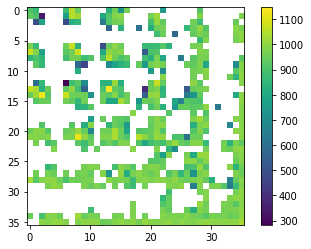

In [91]:
import matplotlib.pyplot as plt
plt.imshow(data_2d)
plt.colorbar()

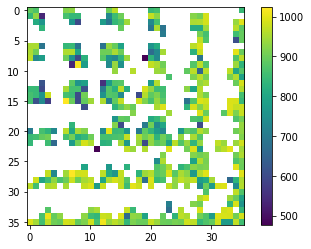

In [17]:
import matplotlib.pyplot as plt
plt.imshow(data_2d)
plt.colorbar()

In [92]:
child_results = es_update.ga_evaluate_children(client,theta=parent_params,
                                               obs_mean=parent_obs_mean,obs_std=parent_obs_std,config=config)

TypeError: evaluate_children_remote() got an unexpected keyword argument 'repeat_n'

In [ ]:
# OLD GA single code
  ###################
    ## OLD CODE #######
        
    # create child
    child = parent_params + np.random.randn(*parent_params.shape) * config["GA_MUTATION_POWER"]
    # lets make the eval bath not parralel.
    

    # evaluate child
    child_f = client.scatter(child,broadcast=True)
    
    now = time.time()
    res = [client.submit(es_update.evaluate_individual,theta=child_f,obs_mean=parent_obs_mean,obs_std=parent_obs_std,eval=True,config=config,
                         pure=False) for _ in range(10)]
    res = client.gather(res)
    print("elapsed: ",time.time()-now)
    
    mean_fitness = np.mean([r["fitness"] for r in res]) 
    if mean_fitness > best_fitness:
        best_fitness = mean_fitness
    mean_bc = np.mean([r["bc"] for r in res],axis=0)
    #print(generation_number,mean_fitness,mean_bc)
    
    obs_sum = np.sum(np.stack([r["obs_sum"] for r in res]),axis=0)
    obs_sq = np.sum(np.stack([r["obs_sq"] for r in res]),axis=0)
    obs_count = np.sum([r["obs_count"] for r in res])
    
    coords = b_map.get_cell_coords(mean_bc,config)
    cell = b_map.data[coords]
    
    need_adding = False
    if cell is None:
        need_adding = True
    elif mean_fitness > cell["eval_fitness"]:
        need_adding = True
        
    if need_adding is True:
        updated_cell = {
            "params" : child,
            "generation_created" : generation_number,

            "eval_fitness" : mean_fitness,
            "eval_bc" : mean_bc,

            "obs_stats" : {   # used for observation normalization. These stats are used for the children as well ??
                "obs_sum" : obs_sum,
                "obs_sq" : obs_sq,
                "obs_count" : obs_count,
            },
        }
        b_map.data[coords] = updated_cell
    
    

In [ ]:
2